Why semi-supervised learning?

https://stats.stackexchange.com/questions/321841/what-are-variational-autoencoders-and-to-what-learning-tasks-are-they-used

Ideal parameters:
$$ \min_{\boldsymbol{\lambda}}\mathcal{D}[p(\mathbf{z}\vert \mathbf{x})\vert\vert q(\mathbf{z}\vert \mathbf{x},\boldsymbol{\lambda})] $$

It should also minimize the reconstruction loss (and optional regularization terms, mainly L1 or L2)

VAE loss function:
$$ELBO(\boldsymbol{\lambda})= E_{q(\boldsymbol{z}\vert \mathbf{x},\boldsymbol{\lambda})}[\log p(\mathbf{x}\vert\boldsymbol{z})]-\mathcal{D}[(q(\boldsymbol{z}\vert \mathbf{x},\boldsymbol{\lambda})\vert\vert p(\boldsymbol{z})]$$

$$ q(\mathbf{z}\vert \mathbf{x},\boldsymbol{\lambda}) = \mathcal{N}(\mathbf{z}\vert\boldsymbol{\mu}(\mathbf{x}), \boldsymbol{\sigma}^2(\mathbf{x})I) $$

conditional distribution:
$$ p_{\boldsymbol{\phi}}(\mathbf{x}\vert\mathbf{z}) = \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}(\mathbf{z}; \boldsymbol{\phi}), \boldsymbol{\sigma}(\mathbf{z}; \boldsymbol{\phi})^2I)$$


$$ ELBO(\boldsymbol{\theta},\boldsymbol{\phi})= \sum_i E_{q_{\boldsymbol{\theta}}(\boldsymbol{z}\vert \mathbf{x}_i,\boldsymbol{\lambda})}[\log p_{\boldsymbol{\phi}}(\mathbf{x}_i\vert\boldsymbol{z})]-\mathcal{D}[(q_{\boldsymbol{\theta}}(\boldsymbol{z}\vert \mathbf{x}_i,\boldsymbol{\lambda})\vert\vert p(\boldsymbol{z})] $$

In [1]:
import os
os.chdir("../../")

In [2]:
# Import packages
from data_preparation.GeoParser import GeoParser
from dimension_reduction.ordination import ordination2d
from sklearn.decomposition import PCA
from IPython.display import Image
import pandas as pd
import numpy as np
load_from_disk = True
load_merge = False


Import models

In [3]:
# from models.discriminative.artificial_neural_networks.hebbian_network.HebbNet import HebbNet
from models.discriminative.artificial_neural_networks.MultiLayerPerceptron import MLP
from utils.utils import dict_of_int_highest_elements, plot_evaluation

In [4]:
# files_destinations
home_path = "/home/simon/"
destination_folder = "annleukemia"
data_folder = "data"
results_folder = "results"
meta_destination_folder = "pandas_meta_df"

plots_folder_path = "/".join([home_path, destination_folder, results_folder, "plots/"])


In [5]:
#dataset_name = "gse33000_and_GSE24335_GSE44768_GSE44771_GSE44770"
dataset_name = "mnist_dropout"
activation = "relu"
#nrep = 3
early_stopping = 200
n_epochs = 5 # MNIST is very easy, for demo it will be good enough
gt_input = 0

# if ladder is yes builds a ladder vae. Do not combine with auxiliary (yet; might be possible and relatively 
# not too hard to implement, but might be overkill. Might be interesting too)
translate = "n" 


In [6]:
# Types of deep generative model

# Convolution neural network (convolutional VAE and convolutional classifier)
use_conv = False #Not applicable if not sequence (images, videos, sentences, DNA...)

Definition of the hyper-parameters

In [7]:
lr = 1e-3
l1 = 0.
l2 = 0.
dropout = 0.5
batch_size = 64
is_pruning = False
#mc = 1 
#iw = 1 

# Neurons layers
h_dims_classifier = [128, 128]


In [8]:
mlp = MLP(input_size=784, input_shape=(1, 28, 28), indices_names=list(range(784)), 
          num_classes=10, h_dims=[128, 128], extra_class=True, l1=l1, l2=l2, 
          is_hebb_layers=False, gt_input=1000, is_pruning=is_pruning, dropout=dropout)

mlp.set_configs(home_path=home_path, results_folder=results_folder, data_folder=data_folder,
                    destination_folder=destination_folder, dataset_name=dataset_name, lr=lr,
                    meta_destination_folder="meta_pandas_dataframes", csv_filename="csv_loggers")

self.input_size 784


In [10]:
mlp.load_example_dataset(dataset="mnist", batch_size=batch_size, unlabelled_samples=False,
                         extra_class=True, unlabelled_train_ds=None, normalize=True, mu=0.1307, var=0.3081, labels_per_class=-1)

is_example = True
# GET ordination from this!
train = np.vstack([x[0].data.numpy() for x in mlp.x_train])
#unlabelled_train = np.vstack([x[0].data.numpy() for x in dgm.unlabelled_x_train])

targets = np.vstack([x[1].data.numpy() for x in mlp.x_train])
labels = [x.tolist().index(1) for x in targets]


No unlabelled data
self.train_loader 937
self.train_loader 64
self.train_loader <torch.utils.data.sampler.RandomSampler object at 0x7fc1f1fa0160>


In [11]:
meta_df = pd.DataFrame(train.transpose(), columns=labels)
#unlabeled_meta_df = pd.DataFrame(unlabelled_train.transpose())


plot at  /home/simon//annleukemia/results/plots//pca/mnist_dropout/none/
coeff shape (784, 2)


IndexError: list index out of range

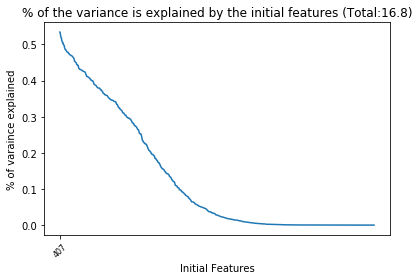

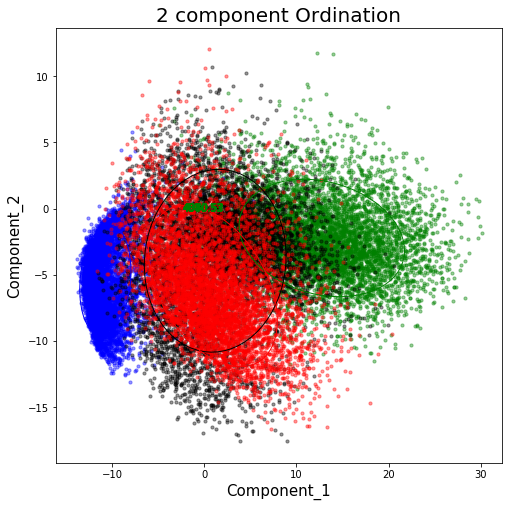

In [12]:
ordination2d(meta_df, epoch="pre", dataset_name=dataset_name, ord_type="pca",
             images_folder_path=plots_folder_path)

In [13]:
subset = pd.DataFrame(train[0:1000].transpose(), columns=labels[0:1000])

In [14]:
# tSNE
#ordination2d(subset, epoch="pre", dataset_name=dataset_name, ord_type="tsne", images_folder_path=plots_folder_path)

In [15]:
print("train data shape", meta_df.shape)
#print("unlabelled meta_df shape", unlabeled_meta_df.shape)


train data shape (784, 60000)


In [16]:
if meta_df is not None:
    mlp.import_dataframe(meta_df, batch_size, labelled=True)
    #dgm.import_dataframe(unlabelled_meta_df, batch_size, labelled=False)

In [17]:
#mlp.define_configurations(early_stopping=early_stopping, warmup=warmup, flavour=vae_flavour)
mlp.set_data(labels_per_class=-1, is_example=True, extra_class=True, ignore_training_inputs=3)

In [18]:
mlp.cuda()
# dgm.vae.generate_random(False, batch_size, z1_size, [1, 28, 28])
mlp.run(n_epochs, start_pruning=3, is_pruning=True)

Log file created:  logs/MLP_parameters.log
Log file created:  logs/MLP_involvment.log
Log file created:  logs/MLP.log
Labeled shape 937
epoch 1
[Train]		 Loss: 1.74, accuracy: 0.8420
[Validation]	 J_a: 1.67, accuracy: 0.8884
epoch 2


KeyboardInterrupt: 

References
Auto-Encoding Variational Bayes https://arxiv.org/abs/1312.6114
Semi-Supervised Learning with Deep Generative Models https://arxiv.org/abs/1406.5298
Ladder Variational Autoencoders https://arxiv.org/abs/1602.02282
Auxiliary Deep Generative Models    https://arxiv.org/abs/1602.05473
Sylvester Normalizing Flows for Variational Inference  https://arxiv.org/abs/1803.05649
Improving Variational Auto-Encoders using Householder Flow https://arxiv.org/abs/1611.09630
Variational Inference with Normalizing Flows https://arxiv.org/abs/1505.05770
Convex combination linear IAF and the Householder Flow, J.M. Tomczak & M. Welling https://jmtomczak.github.io/deebmed.html

Github Ressources:
    https://github.com/wohlert/semi-supervised-pytorch
    https://github.com/jmtomczak/vae_vpflows
    https://github.com/jmtomczak/vae_householder_flow